In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

sns.set_theme()
sns.set(rc={"figure.figsize":(10,5)})

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [3]:
titanic_df = sns.load_dataset("titanic")

In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic_df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic_df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
titanic_df.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


- 클래스별로 몇 명의 인원이 탑승했는가?

In [11]:
# 함수 : count, sum, mean, std ...

titanic_df.groupby("class").count()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


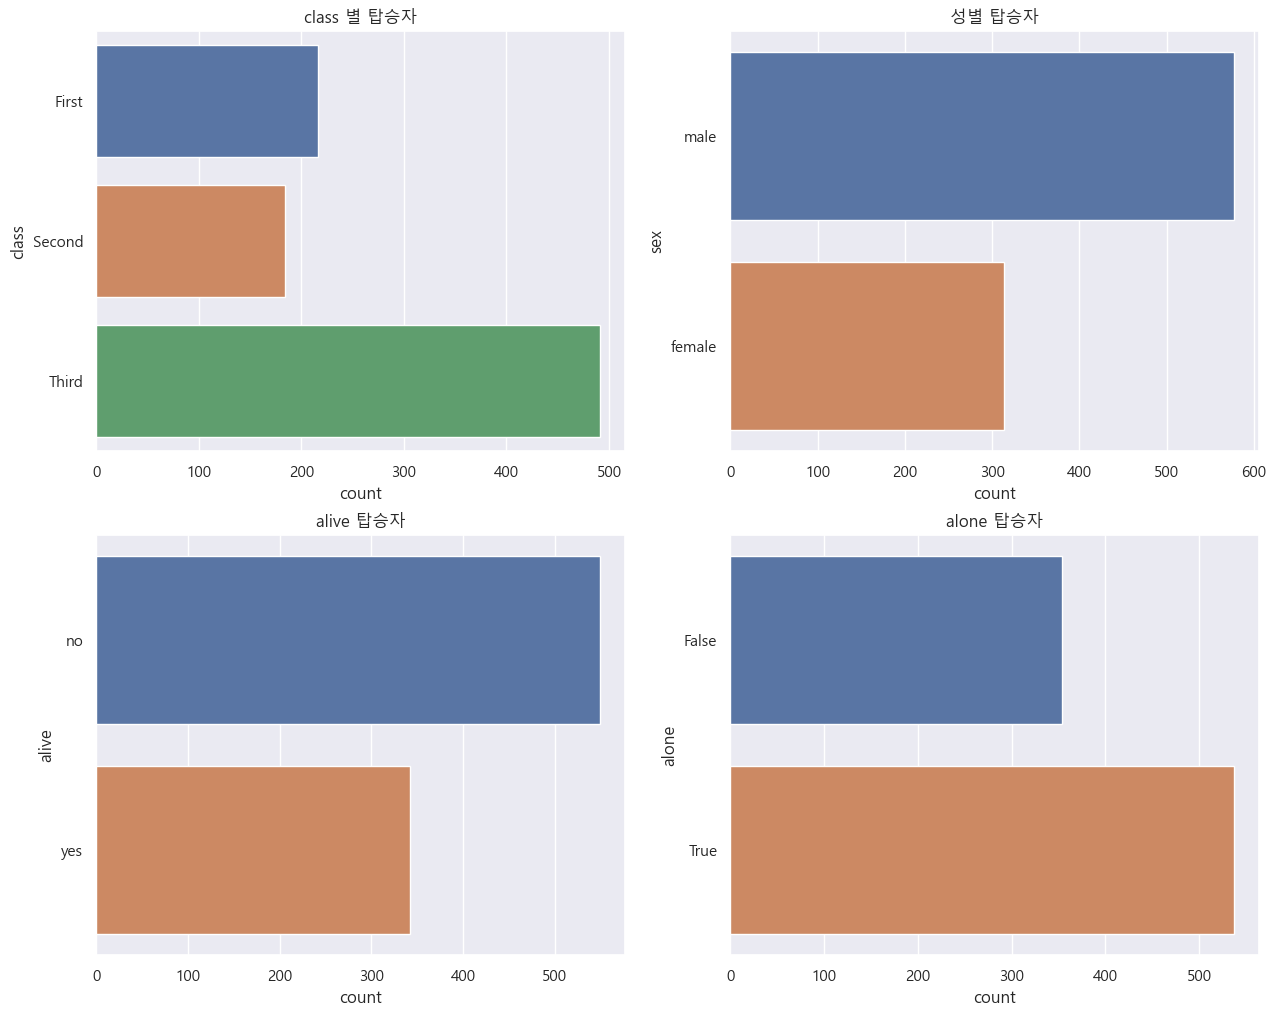

In [15]:
fig, ax = plt.subplots(2,2,figsize=(15,12))
sns.countplot(y="class", data=titanic_df,ax=ax[0,0])
ax[0,0].set_title("class 별 탑승자")
sns.countplot(y="sex", data=titanic_df,ax=ax[0,1])
ax[0,1].set_title("성별 탑승자")
sns.countplot(y="alive", data=titanic_df,ax=ax[1,0])
ax[1,0].set_title("alive 탑승자")
sns.countplot(y="alone", data=titanic_df,ax=ax[1,1])
ax[1,1].set_title("alone 탑승자");

In [16]:
titanic_df.groupby("class")["fare"].mean()

class
First     84.154687
Second    20.662183
Third     13.675550
Name: fare, dtype: float64

In [17]:
titanic_df.groupby("class")["fare"].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [18]:
titanic_df[titanic_df["survived"] == 1]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [23]:
titanic_df[titanic_df["survived"] == 1].groupby("class").count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [24]:
titanic_df.query("alive == 'yes'").groupby("class")[['survived','pclass','sex']].count()

,survived,pclass,sex
class,,,
First,136,136,136
Second,87,87,87
Third,119,119,119


In [28]:
titanic_df.groupby("class")["age"].agg(["min","median","max"])

,min,median,max
class,,,
First,0.92,37.0,80.0
Second,0.67,29.0,70.0
Third,0.42,24.0,74.0


In [32]:
titanic_df[titanic_df["age"]>30].groupby("class")["age"].agg("median")

class
First     45.0
Second    39.0
Third     38.0
Name: age, dtype: float64

In [35]:
titanic_df.groupby(['class','sex'])['age'].median()

class   sex   
First   female    35.0
        male      40.0
Second  female    28.0
        male      30.0
Third   female    21.5
        male      25.0
Name: age, dtype: float64

In [36]:
titanic_df.groupby(['class','sex'])['age'].median().unstack()

sex,female,male
class,,
First,35.0,40.0
Second,28.0,30.0
Third,21.5,25.0


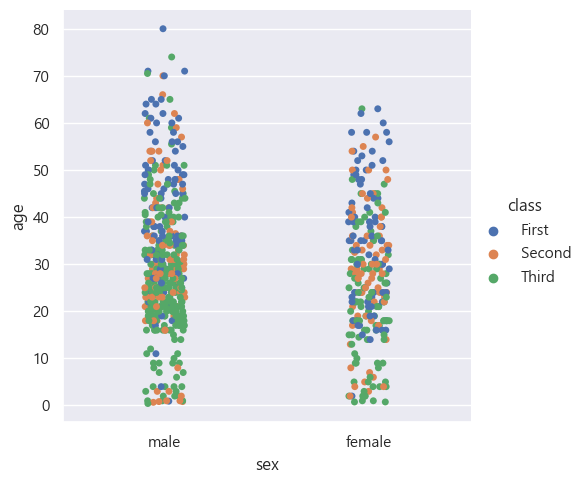

In [40]:
sns.catplot(x="sex",y="age", data=titanic_df, hue="class");

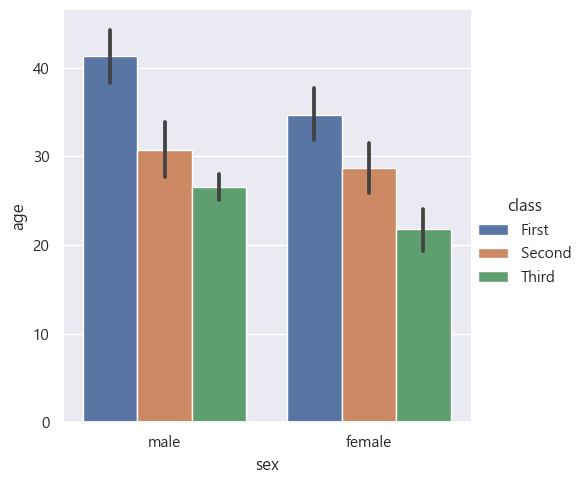

In [41]:
sns.catplot(x="sex",y="age", data=titanic_df, hue="class", kind="bar");

In [43]:
titanic_df.groupby(['class','who'])['fare'].mean().unstack()

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


In [44]:
titanic_df.pivot_table('survived',index='class',columns='who')


who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


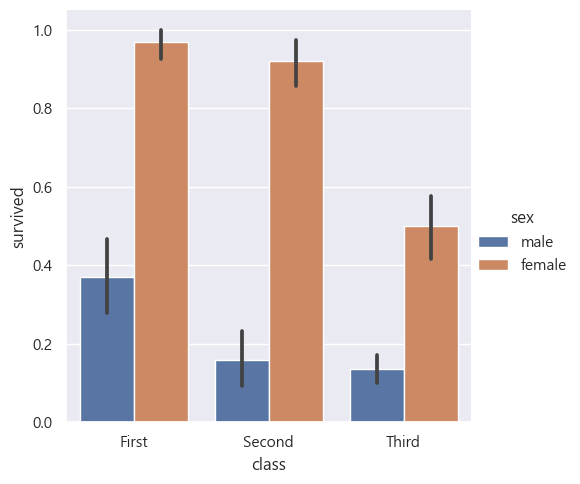

In [48]:
sns.catplot(x="class",y="survived",data=titanic_df, hue="sex",kind="bar")

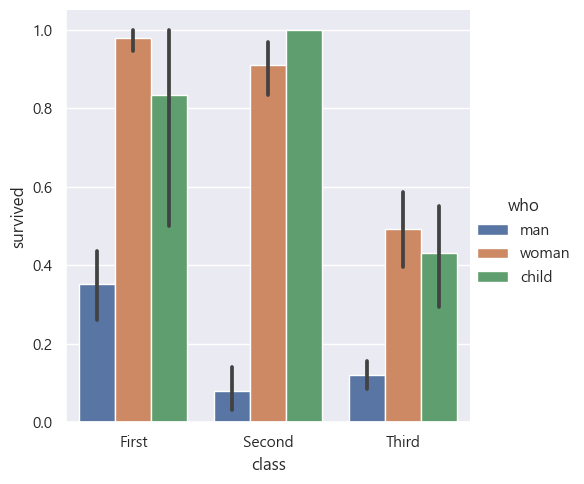

In [49]:
sns.catplot(x="class",y="survived",data=titanic_df, hue="who",kind="bar")

In [52]:
age = pd.cut(titanic_df['age'],[0,18,40,80])

titanic_df.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [53]:
titanic_df.pivot_table('survived','who','class',margins=True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


In [55]:
titanic_df.pivot_table('survived','deck','class')

class,First,Second,Third
deck,,,
A,0.466667,NaN,NaN
B,0.744681,NaN,NaN
C,0.593220,NaN,NaN
D,0.758621,0.750,NaN
E,0.720000,0.750,1.0
F,NaN,0.875,0.2
G,NaN,NaN,0.5


In [56]:
titanic_df.pivot_table('survived','embark_town','class')

class,First,Second,Third
embark_town,,,
Cherbourg,0.694118,0.529412,0.378788
Queenstown,0.500000,0.666667,0.375000
Southampton,0.582677,0.463415,0.189802


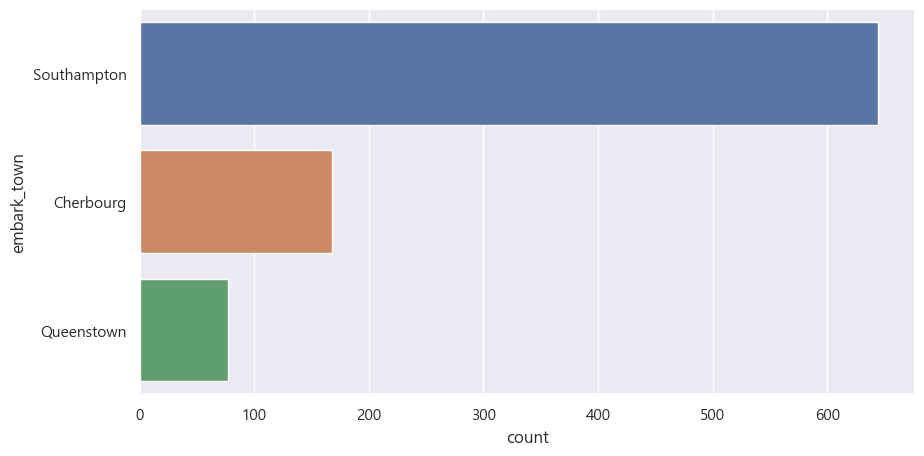

In [57]:
sns.countplot(y="embark_town",data=titanic_df);

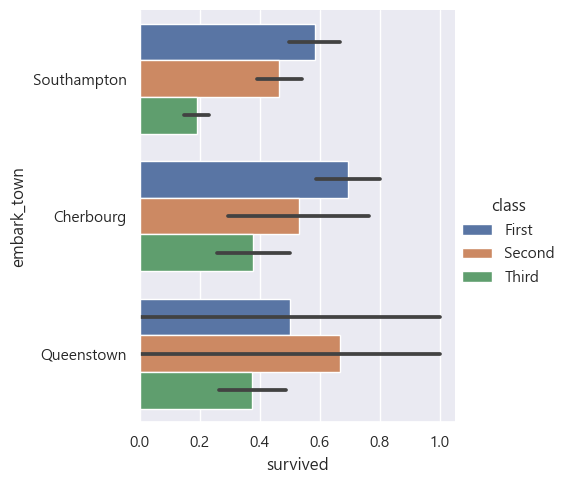

In [60]:
sns.catplot(x="survived",y="embark_town",kind="bar",hue='class',data=titanic_df)

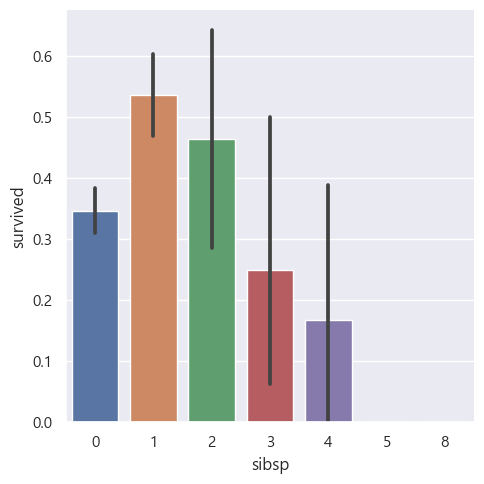

In [62]:
sns.catplot(x="sibsp",y="survived",kind="bar",data=titanic_df)